# Exploratory Data Analysis Project

## Research on apartment sales ads

## Project Description
You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

## Table of contents:

1. [Open the data file and study the general information](#point1) 
2. [Data preprocessing](#point2)
3. [Make calculations and add them to the table](#point3)
4. [Conduct exploratory data analysis](#point4)
5. [Overall conclusion](#point5)

### Open the data file and study the general information. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
data = pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


From the start we see that there are a lot of missing values. We won't change names of the columns since everything is clear.

### Data preprocessing

In [4]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')
data['date_posted'] = data['date_posted'].dt.round('1D')

In the 'date_posted' column we change the type to datetime. 
We don't need an exact hour and it is the same anyway, so we might round it to date.

In [5]:
data['days_listed'].isna().sum()

3181

In the 'days_listed' column we have 3181 rows with missing values, my guess is that to the point the information was collected, the apartments were still on sale. The last apartments on sale were added on 2019-05-03, near the date the data was collected. The oldest ones on sale were added on 2014-11-27, which means that it was on sale more than 4 years, we have examples like this in our data, so we consider our guess realistic.

In [6]:
data['bedrooms'].value_counts()
data.query('bedrooms == 0 & is_open_plan == False & is_studio == False')
data.query('bedrooms > 7 & total_area < 150')

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000


In the 'bedrooms' column we see a range of values, for all apartments with 0 bedroom - they are either studios or open plan apartments, so it's fine. As for apartments with more than 7 bedrooms(there are 31 of them) - they all are bigger than 150 sq.m so it is also okay.

In [7]:
data['kitchen_area'].describe()
data.query('kitchen_area == "NaN" & living_area == "NaN" & is_studio == False & is_open_plan == False')

kitchen_ratio = data['kitchen_area'] / data['total_area']
new_kitchen_area = data['total_area'] * kitchen_ratio.mean()
for row in data:
    data['kitchen_area'] = data['kitchen_area'].fillna(value=new_kitchen_area)
    
data['kitchen_area'] = round(data['kitchen_area'], 1)

As for 'kitchen_area' column - we check the mean ratio of kitchen area to total area -and we will replace missing values according to this ratio.

In [8]:
living_ratio = data['living_area'] / data['total_area']
new_living_area = data['total_area'] * living_ratio.mean()
for row in data:
    data['living_area'] = data['living_area'].fillna(value=new_living_area)
    
data['living_area'] = round(data['living_area'], 1)

Same with 'livivng_area' column. We will replace missing values according to mean ratio.

In [9]:
print(data['balconies'].value_counts())
data['balconies'] = data['balconies'].fillna(value=0)

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balconies, dtype: int64


In the 'balcony' column we will replace missing values with 0 since it's the user input, and not filling this information means that there aren't any balconies.

In [10]:
data['ceiling_height'].describe()
data['ceiling_height'].isnull().sum()
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

In the 'ceiling_height' we have 9195 rows with missing values, we will fill them according to common sense and median height of 2.65 metres. 

In [11]:
data['floors_total'].isnull().sum()
data.query('floors_total == "NaN"')
data['floors_total'] = data['floors_total'].fillna(value=data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype('int')

In 'floors_total' column we have 86 rows with missing values, we can't replace them with real numbers, we also don't want to drop them, so we will fill missing values with median (9) eventhough there are values like "20" in the 'floor' column. It is not logical, but i guess it's the best we can do here so it won't affect categorization later.

In [12]:
data['bike_parking'].value_counts()
data['bike_parking'] = data['bike_parking'].fillna(value=False)

In the 'bike_parking' column values are mostly missed, we assume that all these apartments do not have bike parking. Overall, there are only 50 options with bike parking, which kinda makes sense in Saint-Petersburg.

In [13]:
data['locality_name'].unique()
data['locality_name'].isnull().sum()
data['locality_name'] = data['locality_name'].fillna(value='Undefined')

As for 'locality_name' column we basically have Saint-Petersburg and everything else, all the villages and small towns. We have 49 rows with missing values and with unique() method we see that there is a value 'nan' in the list, but somehow I can't get the rows with query() method to investagate it further, it returns empty DataFrame. So we will just replace missing values with 'Undefined'. I wanted to check for duplicates with Counter, but did not suceed to change column data type to string.

In [14]:
data['ponds_within_3000'] = data['ponds_within_3000'].fillna(value=0)
data['parks_within_3000'] = data['parks_within_3000'].fillna(value=0)

If there are missing values in 'parks_within_3000' and 'ponds_within_3000' columns, then, I guess there are no parks or ponds within 3000 meters, and we can fill missing values with 0. As for 'airport_dist', 'park_dist', 'pond_dist' and 'city_center_dist' - values should be assigned automatically according to Yandex.Maps, so I guess it's some sort of technical problem.

In [15]:
columns_int = ['last_price', 'balconies', 'parks_within_3000', 'ponds_within_3000']
data[columns_int] = data[columns_int].astype('int')
data['locality_name'] = data['locality_name'].astype('str')

We changed data types for 'last_price', 'balconies', 'parks_within_3000' and 'ponds_within_3000' columns to integer type, and 'locality_name' to string type (which doesn't work by the way). We can't change 'days_listed' column type, because it's mixed.

### Make calculations and add them to the table

In [16]:
#calculating price per square meter
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = round(data['price_per_meter'])
data['price_per_meter'] = data['price_per_meter'].astype('int')

In [17]:
#extracting year, month, and day of ad posting
data['ad_day'] = data.date_posted.dt.day
data['ad_month'] = data.date_posted.dt.month
data['ad_year'] = data.date_posted.dt.year

In [18]:
#adding category by floor (first, last, middle)
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor != 1:
        if floor == floors_total:
            return 'last'
        else:
            return 'other'
           
data['floor_category'] = data.apply(categorize_floor, axis=1)
data['floor_category_number'] = data['floor_category'].replace({'first':1, 'other':2, 'last':3})

In [19]:
#calculating ratio of kitchen area to total area
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data['kitchen_ratio'] = round(data['kitchen_ratio'], 2)

In [20]:
#calculating ratio of living area to total area
data['living_ratio'] = data['living_area'] / data['total_area']
data['living_ratio'] = round(data['living_ratio'], 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
date_posted              23699 non-null datetime64[ns]
days_listed              20518 non-null float64
last_price               23699 non-null int64
bedrooms                 23699 non-null int64
kitchen_area             23699 non-null float64
living_area              23699 non-null float64
total_area               23699 non-null float64
balconies                23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23699 non-null int64
floor                    23699 non-null int64
total_images             23699 non-null int64
bike_parking             23699 non-null bool
is_studio                23699 non-null bool
is_open_plan             23699 non-null bool
locality_name            23699 non-null object
airport_dist             18157 non-null float64
city_center_dist         18180 non-null float64
park_dist                8079 non-null flo

Firstly, we calculate price per square meter by dividing price to area, create a new column 'price_per_meter', we round values and turn the data type to integer.

Then we add three new columns: 'ad_day', 'ad_month' and 'ad_year'. We extract values from 'date_posted'column.

Then we add new column 'floor_category' and assign category with the function we wrote using 'floor' and 'floors_total' column. There are three categories: 'first', 'last' and 'other'.

We add two new columns for ratio between total area and kitchen area, as well as for ratio between total area and living area. Wa round them to two signs after floating point.

### Conduct exploratory data analysis and follow the instructions below:

In [22]:
#visualizing total area distribution
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

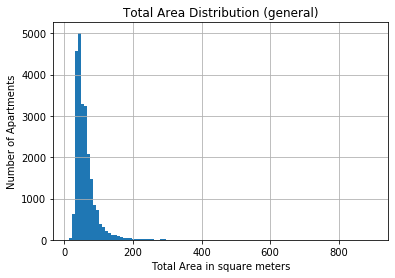

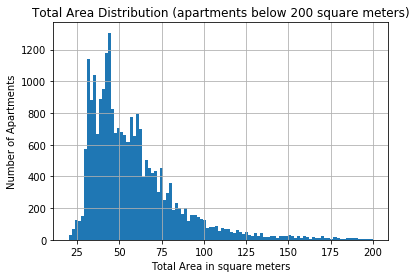

In [23]:
data['total_area'].hist(bins=100)
plt.title("Total Area Distribution (general)")
plt.xlabel("Total Area in square meters")
plt.ylabel("Number of Apartments")
plt.show()


data['total_area'].hist(bins=100, range=(20, 200))
plt.title("Total Area Distribution (apartments below 200 square meters)")
plt.xlabel("Total Area in square meters")
plt.ylabel("Number of Apartments")
plt.show()

In 'total_area' column we have a range of values from 12 to 900 metres, but the mean is only 60, and the third quartile is only 69.9 metres. On histogram we see almost no values less then 30 metres, we see highest peak around 45 metres, peak around 50-63 metres and then our histogram is slowly going down to 200 metres, over 200 we have only a few apartments. We consider normal range to be from 30 to 150 metres.

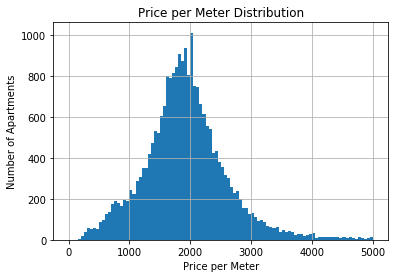

In [24]:
data['price_per_meter'].hist(bins=100, range=(0, 5000))
plt.title("Price per Meter Distribution")
plt.xlabel("Price per Meter")
plt.ylabel("Number of Apartments")
plt.show()

In 'last_price' column i can't plot a histogram that would be informative, so let's look at 'price_per_meter' column. There are 505 rows with price per meter more than 4000, and 321 rows with price per meter less than 500, so we consider them as outlier. 

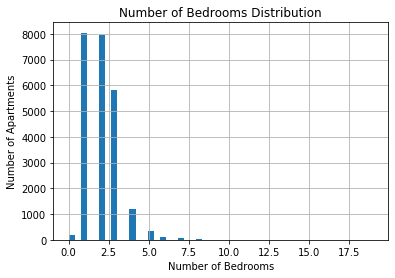

In [25]:
data['bedrooms'].hist(bins=50)
plt.title("Number of Bedrooms Distribution")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Apartments")
plt.show()

In the 'bedroom' column we see that there are almost no apartments with no bedrooms (studios and open plan), mostly apartments have from 1 to 2 bedrooms, little bit less have 3 bedrooms, and then there's a drop to 4 bedrooms, very little of 5 bedrooms and almost none from 6 and upper. We consider number of bedrooms more than 8 to be an outlier.

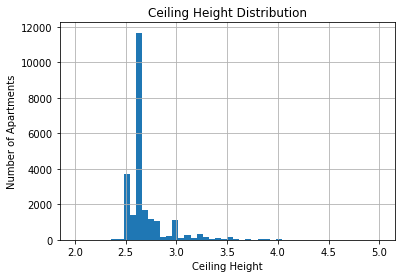

In [26]:
data['ceiling_height'].describe()
data.query('ceiling_height < 2 or ceiling_height > 5')

data.loc[data['ceiling_height'] < 2] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 5] = data['ceiling_height'].median()

data['ceiling_height'].hist(bins=50)
plt.title("Ceiling Height Distribution")
plt.xlabel("Ceiling Height")
plt.ylabel("Number of Apartments")
plt.show()

In 'ceiling_height' column there definetely are outliers, since the Q3 is 2.7, and the max is 100. There are only 39 rows, where height is less than 2 or bigger than 5, so we might just replace them with median.

In [27]:
data_fixed = data.query('30 < total_area < 150 & 500 < price_per_meter < 4000 & bedrooms < 8')
data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21538 entries, 0 to 23698
Data columns (total 30 columns):
date_posted              21538 non-null object
days_listed              18752 non-null float64
last_price               21538 non-null float64
bedrooms                 21538 non-null float64
kitchen_area             21538 non-null float64
living_area              21538 non-null float64
total_area               21538 non-null float64
balconies                21538 non-null float64
ceiling_height           21538 non-null float64
floors_total             21538 non-null float64
floor                    21538 non-null float64
total_images             21538 non-null float64
bike_parking             21538 non-null object
is_studio                21538 non-null object
is_open_plan             21538 non-null object
locality_name            21538 non-null object
airport_dist             16634 non-null float64
city_center_dist         16652 non-null float64
park_dist                7196 no

We create a new DataFrame named 'data_fixed' removing those outliers(about 9% of data).

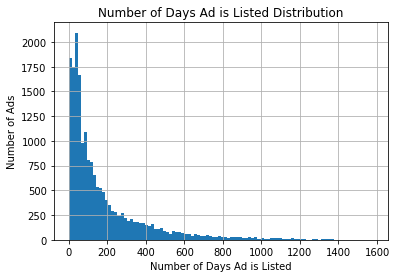

In [28]:
data_fixed['days_listed'].describe()
data_fixed['days_listed'].median()
data_fixed['days_listed'].hist(bins=100)
plt.title("Number of Days Ad is Listed Distribution")
plt.xlabel("Number of Days Ad is Listed")
plt.ylabel("Number of Ads")
plt.show()

As for 'days_listed' column we see that standard deviation is high, range of values is from 1 to 1580 days. Mean is 179 days(half a year), while median is only 95, which means that we have outliers that affect the average time. Examinig all values less than Q1, we consider sale happening in less than 45 days rather quick, and examining values more than Q3 we consider sales that took more than 300 days to be extra long.

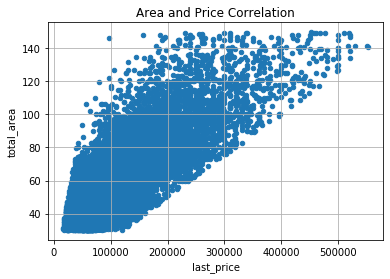

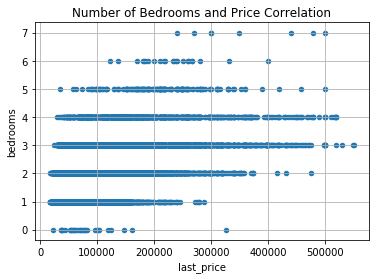

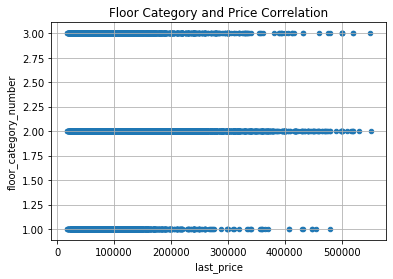

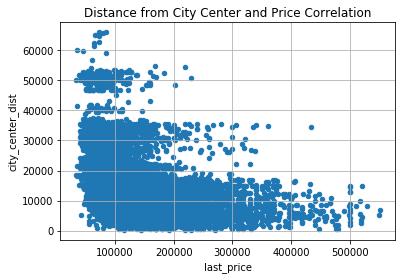

In [29]:
data_fixed.plot(x='last_price', y='total_area', kind='scatter', grid=True)
plt.title("Area and Price Correlation")
plt.show()

data_fixed.plot(x='last_price', y='bedrooms', kind='scatter', grid=True)
plt.title("Number of Bedrooms and Price Correlation")
plt.show()

data_fixed.plot(x='last_price', y='floor_category_number', kind='scatter', grid=True)
plt.title("Floor Category and Price Correlation")
plt.show()

data_fixed.plot(x='last_price', y='city_center_dist', kind='scatter', grid=True)
plt.title("Distance from City Center and Price Correlation")
plt.show()

What has the biggest influence on apartment's price? From four scatter plots we see that total area has the biggest impact on price. 
Number of bedrooms also matters, however the starting price is pretty much the same for apartments with less than 5 bedrooms and the highest prices are for apartments with 3 or 4 bedrooms. 
As for the floor - we definetely see that the first floor is the cheapest, last one is little bit more expensive and all the other floors have higher average price.
For distance from city center we see three big groups in histogram: one for up to 20000 metres (city center) with highest prices, one from 20000 to 40000 (still in city) with lower prices, and then a group around 50000 metres, which is basically outside of Saint Petersburg already, with the lowest prices.

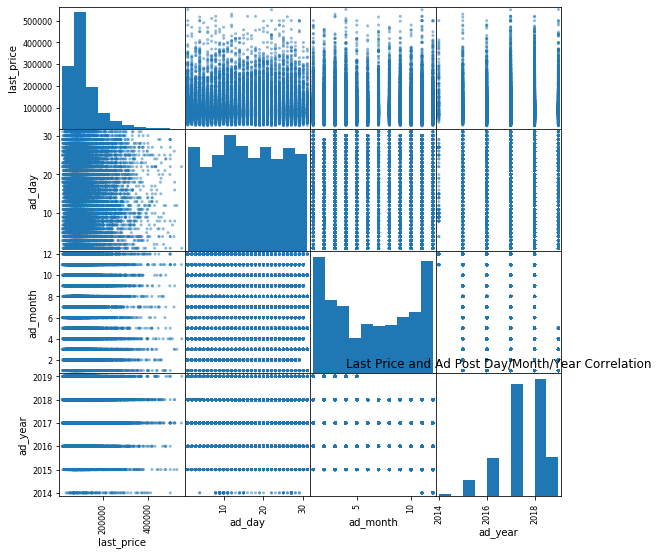

In [31]:
publishing = data_fixed[['last_price', 'ad_day', 'ad_month', 'ad_year']]
pd.plotting.scatter_matrix(publishing, figsize=(9,9))
plt.title("Last Price and Ad Post Day/Month/Year Correlation")
plt.show()

As for time of publishing the ad - there's no clear correlation with day of the week, there's very light correlation with month - apparently, in summer there are less ads and the prices are little lower. We can definetely see that the price is going higher every year.

In [29]:
#creating list of top 10 localities
localities = data.groupby('locality_name')['price_per_meter'].count().reset_index().sort_values(by='price_per_meter', ascending=False).head(10)
localities.columns = ['locality_name', 'count']
avg_price = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
top_localities = localities.merge(avg_price, on='locality_name')
top_localities.sort_values(by='price_per_meter', ascending=False)

,locality_name,count,price_per_meter
0,Saint Petersburg,15695,2295.109971
4,Pushkin,369,2062.506775
8,Kudrovo village,299,1849.471572
6,Pargolovo village,327,1803.504587
1,Murino village,554,1713.131769
2,Shushary village,440,1573.547727
5,Kolpino,338,1508.488166
7,Gatchina,306,1375.143791
3,Vsevolozhsk,398,1373.103015
9,Vyborg,237,1162.810127


We have a list of top ten localities - Saint Petersburg is the most popular and the most expensive, and the last and most cheap out of localities is Vyborg, out of all localities it's farthest from Saint Petersburg.

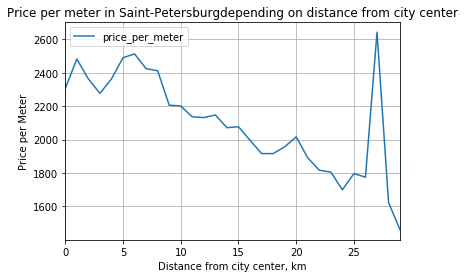

In [35]:
#calculating price distribution for Saint-Petesrburg depending on distance from city center
sp = data_fixed.query('locality_name == "Saint Petersburg"').copy()
sp['city_center_dist_km'] = round(sp['city_center_dist'] / 1000)
sp.pivot_table(index='city_center_dist_km', values='price_per_meter').plot(grid=True)
plt.title("Price per meter in Saint-Petersburgdepending on distance from city center")
plt.xlabel("Distance from city center, km")
plt.ylabel("Price per Meter")
plt.show()

From the graph of correlation between average price per meter and distance from city center we can see that the price is between 2200 and 2500 for distance less than 10 km, and then it goes down to distance of 26 km, and then up again. so we assume that city center border exists on mark of 10 kilometers.

In [36]:
#calculating correlation for city center
data_center = data_fixed.query('city_center_dist < 10000').copy()
data_center = data_center[['last_price', 'bedrooms', 'total_area', 'ceiling_height']]
data_center.corr()

,last_price,bedrooms,total_area,ceiling_height
last_price,1.000000,0.522238,0.812545,0.275001
bedrooms,0.522238,1.000000,0.786600,0.246473
total_area,0.812545,0.786600,1.000000,0.318414
ceiling_height,0.275001,0.246473,0.318414,1.000000


Let's examine the correlation between price, total area, number of bedrooms and ceiling height in the city center. First of all, all the Pearson correlation coefficients are positive, which means that the bigger the apartment, the higher the ceiling, the more bedrooms - the higher the price. The strongest dependancy is between total area and price, the weakest - between ceiling height and price.

In [37]:
center_final = data_fixed.query('city_center_dist < 10000').copy()
center_final = center_final[['last_price', 'bedrooms', 'floor_category_number', 'city_center_dist', 'ad_day', 'ad_month', 'ad_year']]

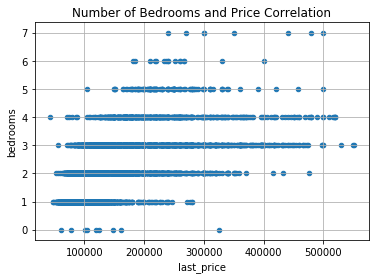

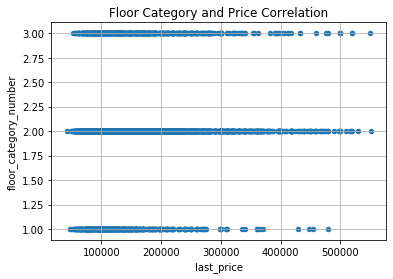

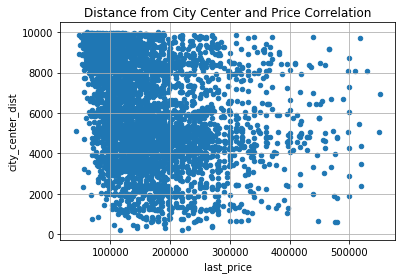

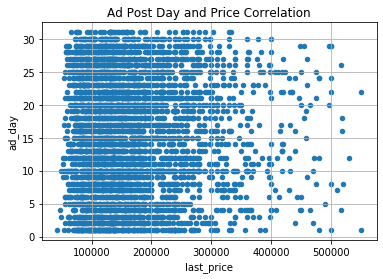

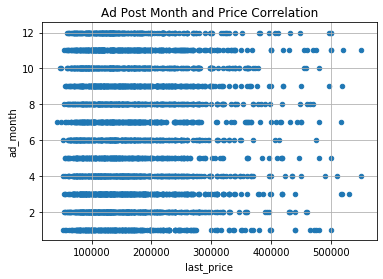

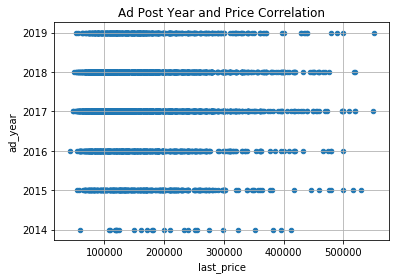

In [38]:
center_final.plot(x='last_price', y='bedrooms', kind='scatter', grid=True)
plt.title("Number of Bedrooms and Price Correlation")
plt.show()

center_final.plot(x='last_price', y='floor_category_number', kind='scatter', grid=True)
plt.title("Floor Category and Price Correlation")
plt.show()

center_final.plot(x='last_price', y='city_center_dist', kind='scatter', grid=True)
plt.title("Distance from City Center and Price Correlation")
plt.show()

center_final.plot(x='last_price', y='ad_day', kind='scatter', grid=True)
plt.title("Ad Post Day and Price Correlation")
plt.show()

center_final.plot(x='last_price', y='ad_month', kind='scatter', grid=True)
plt.title("Ad Post Month and Price Correlation")
plt.show()

center_final.plot(x='last_price', y='ad_year', kind='scatter', grid=True)
plt.title("Ad Post Year and Price Correlation")
plt.show()

What affects the apartmnet price in the city center? We don't check the total area correlation, so we see pretty strong influence of the number of rooms (up to 4 rooms, then the price doesn't go higher - this is also connected to overall area), distance to city center (the closer - the higher the price) the floor(first is way cheaper than anything else, and the last is cheaper than anything in between). As for ad publication date - I see no connection with the day of the week, neither with month, and even correlation with the year is not that obvious. Well, it means that the city center apartment market is pretty stable.

### Overall conclusion

Overall, there are many many factors that influence the apartment market in big city. Starting from the obvious - the bigger the apartment - the higher the price (eventhough it doesn't work on super big apartments), the closer to the city center - the higher the price, we eventually found correlations even with things like ceiling height, and also proved hypothesis that first and last floors are the cheapest. Comparing results for overall city and for city center we can say, that city center market is more stable in general, there's always demand no matter the season or year. 